In [1]:
import matplotlib.pyplot as plt
#from scipy.signal import 
from arenz_group_python import EC_Data, EC_Datas
from arenz_group_python import CV_Datas, CV_Data
from pathlib import Path
import sys

In [2]:
#Find CV files to plot
files = list(Path().glob('CV*.tdms'))

#Load all data files
data = []
for path_to_file in files:
    data.append(EC_Data(path_to_file))


[<TdmsChannel with path /'EC'/'Time'>, <TdmsChannel with path /'EC'/'E'>, <TdmsChannel with path /'EC'/'i'>]
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported
xchannel E not supported


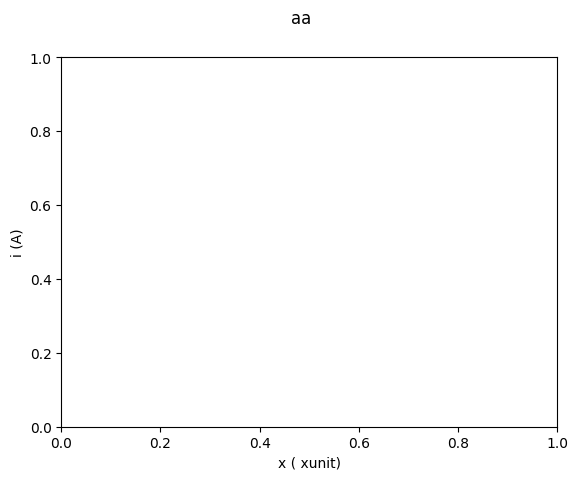

In [10]:
#Plot CV files
fig = plt.figure()
plt.suptitle("aa")
b = fig.subplots(1)
print(data[0].rawdata.channels())
for x in data:
    x.plot("E","i", plot=b, y_smooth=40)

xchannel E not supported


C:\Users\gustav.wiberg\Documents\GitHub\Python\Arenz_Group_Python\src\arenz_group_python\data_treatment\ec_datas.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


<Axes: xlabel='x ( xunit)', ylabel='i (A)'>

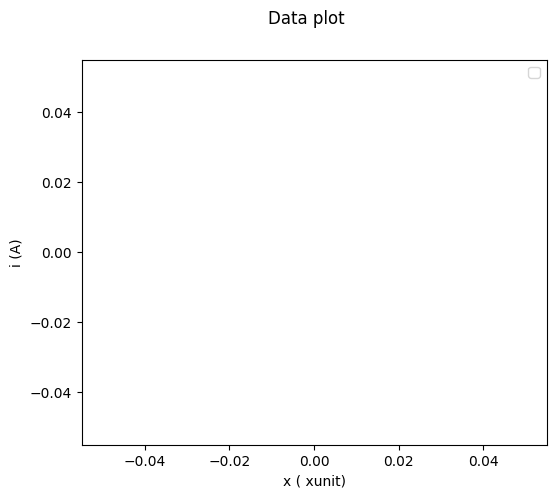

In [4]:
ecdatas = EC_Datas(files[0:1])

ecdatas.plot('E','i',y_smooth=20)

In [5]:
b = EC_Data(files[2])
print(b.setup["Rate"])

0.250 V/s


CV_144857_ 3 : EC data sets:  2
CV_144857_ 3
7.500e-01 V/s 100000 Pa
0.25
{'Current Range': '1mA', 'Control Mode': 'WE', 'Cell Switch': 'TRUE', 'Start': '0.100 V', 'Start_Delay': '0.000 s', 'V1': '1.100 V', 'V2': '0.100 V', 'Rate': '0.250 V/s', 'Nr of Sweeps': '3.00', 'Method.Duration': '24.0', 'Method.Cycle Duration': '8.0', 'Method.Avg.Time': '0.008', 'AC Frequency': '0.000E+0 Hz', 'AC Amplitude': '0.0000 V', 'RHE': '-0.938 V', 'Gas': 'Ar', 'Temp_0': '298.15 K', 'Temp_1': '298.15 K', 'Pressure': '100000 Pa', 'Cell Material': 'Glass', 'CounterElectrode': 'Pt', 'Ref.Electrode': 'RHE', 'R.solution': '-1.00 Ohm', 'IR.compensation': '-1.00 Ohm', 'Electrolyte1': '0.1 M_HClO4: H2O_153', 'Electrolyte2': '_: _', 'Electrolyte3': '_: _', 'Electrode.Material': '', 'Electrode.Tip': '', 'Electrode.Area': '1.96E-5 m^2', 'Electrode.ExElectrode': '', 'Electrode.Cat.Loading': '0.00E+0 g m^-2', 'Electrode.Cat.Weight': '0.00E+0 g', 'Electrode.Cat.totWeight': '0.00E+0 g', 'Electrode.Cat.w%': '0.00', 'Ele

'CV_144857_ 3'

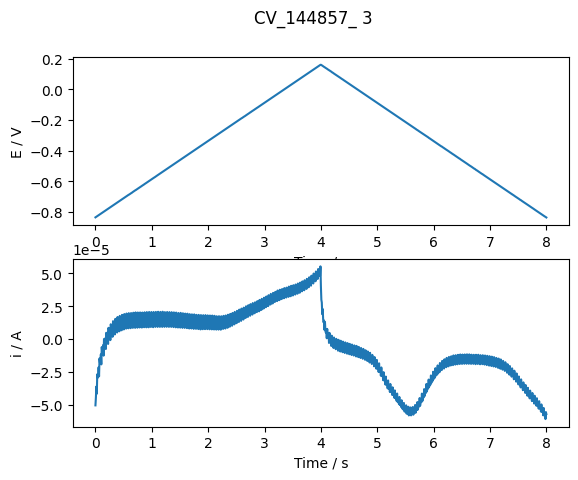

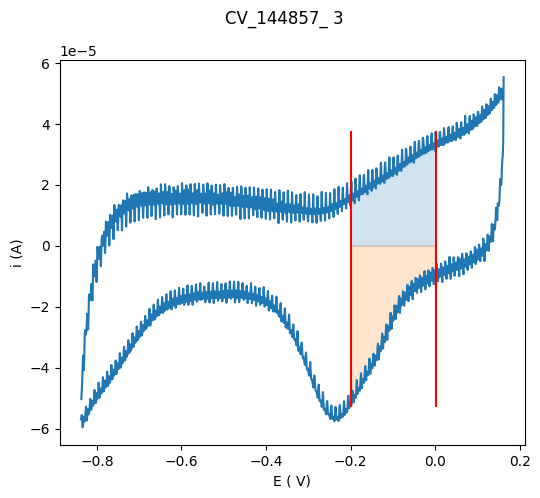

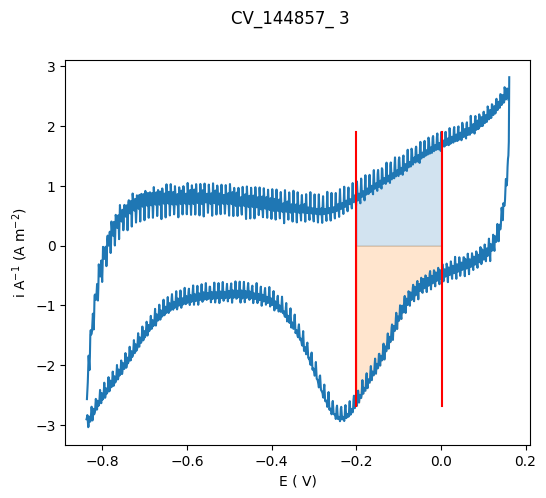

In [6]:
b = EC_Data(files[2])
b.plot_rawdata()
print(b.name)
print(b.rate + b.rate + b.rate, b.setup["Pressure"])
print(float(b.rate))


a = CV_Data(files[2])
print(a.setup)
print("Area", a.temp0)
print(a.rate,a.setup["Rate"],a.setup["Electrode.Area"],"AAAA", a.area )
#a.plot( )

qp,qn= a.integrate(-0.2,0.0,"all",True)
aa = a.weight
aa.value=10

print("Integration:",str(qp / a.area* a.area))
a.norm("area")
print("Integration_",a.integrate(-0.2,0.0,"all",True))
print(files[2])
a.name

In [7]:
a = "C^-3 /m^2 m^2.5"
b = a.split(" ", 100)
k={}
for c in b:
    aa = c.split("^",2)
    nyckel = aa[0]
    sign = 1
    fac =1
    if nyckel.startswith("/"):
        nyckel = nyckel[1:]
        sign = -1
    if len(aa)>1:
        fac = float(aa[1]) 
    val = float(k.get(nyckel, 0))  
    k[nyckel] = val + sign*fac
prep={} 
for key, value in k.items():
    if int(value*100) != 0:
        prep[key] = value
s =""
print (prep)  
for key, value in prep.items():
    if int(value*10) == 10:
        s = s +" " + key
    elif int(value) == value:
        s = s+ f' {key}^{value:.0f}'
    else:
        s = s+ f' {key}^{value:.1f}'
print(s)

{'C': -3.0, 'm': 0.5}
 C^-3 m^0.5


CV_152635_ 3.tdms
CV_152635_ 3 : EC data sets:  4
-3.004e-03 C
Integration_ [<arenz_group_python.data_treatment.util.Quantity_Value_Unit object at 0x000001F397C88550>, <arenz_group_python.data_treatment.util.Quantity_Value_Unit object at 0x000001F397AB3450>]


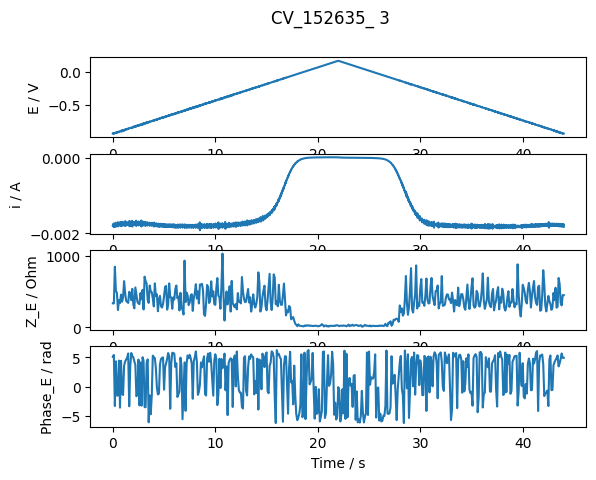

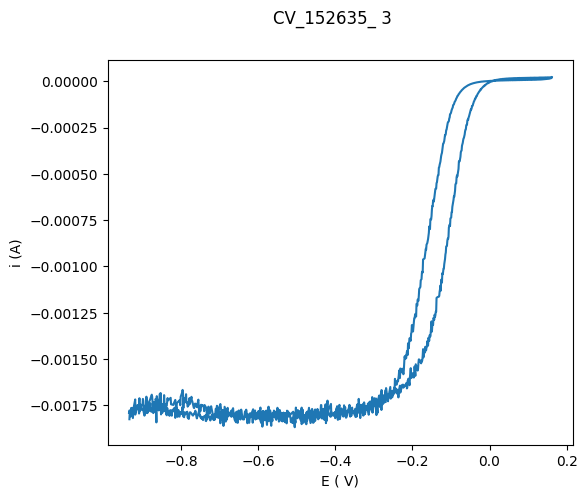

In [8]:
file_num=11
print(files[file_num])
b = EC_Data(files[file_num])
b.plot_rawdata()
#c= CV_Data(files[file_num], sgfg="bf")
a = CV_Data()
a.conv(b)
a.plot()

print("Integration_",a.integrate(-0.2,0))




<Axes: xlabel='E ( V)', ylabel='i (A)'>

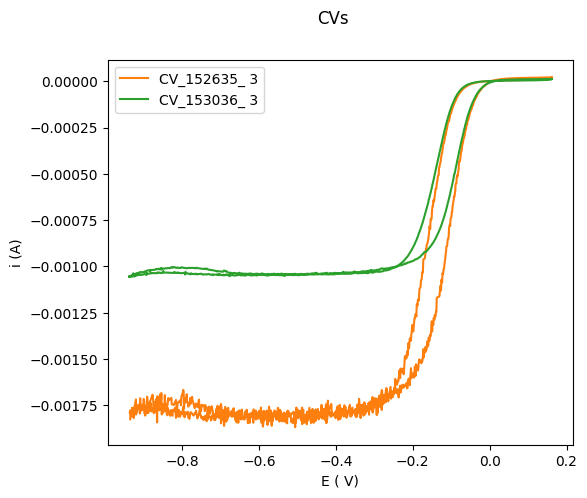

In [9]:
cv = CV_Datas(files[11:13])
cv.plot()

